In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76, lab2rgb
import os
import json

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def getclf(number_of_colors):
    clf = KMeans(n_clusters=number_of_colors)
    return clf

def getLabels(clf, image):
    modified_image = cv2.resize(image, (600, 400), interpolation=cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0] * modified_image.shape[1], 3)
    labels = clf.fit_predict(modified_image)
    return labels

def get_hex_colors(labels, clf):
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    return hex_colors

def get_rgb_colors(labels, clf):
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    return rgb_colors


def plotPie(counts, hex_colors):
    plt.figure(figsize=(8, 6))
    plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
    
def init(image_path, clusters, mode, showPie, writeToJson):
    image = get_image(image_path)
    clf = getclf(clusters)
    labels = getLabels(clf, image)
    hex_colors = get_hex_colors(labels, clf)
    if(mode != "rgb"):
        colors = hex_colors
    if(mode == "rgb"):
        colors = get_rgb_colors(labels, clf)
        print(colors)
    if(showPie):
        plt.imshow(image)
        plotPie(Counter(getLabels(clf, image)), hex_colors)
    if(writeToJson):
        json_object = json.dumps(hex_colors, indent = 4)
        with open("colors.json", "w") as outfile: 
            outfile.write(json_object)
        with open('colors.json', 'r') as openfile: 
            json_object = json.load(openfile) 
            print(json_object) 
            
def modifyImage(image):
    modified_image = cv2.resize(image, (600, 400), interpolation=cv2.INTER_AREA)
    return modified_image

# def compareColor(image1_path):
def compareColor():

#     image1 = get_image(image1_path)
#     modifyImage1 = modifyImage(image1) 
    
    im1 = [91.15341554,  4.9825107 ,  4.99780469]
    im11 = np.uint8(np.asarray([[im1]]))
    im12 = modifyImage(im11)
    
    im2 = [223.03739605,   2.74173877,  19.82270475]
    im22 = np.uint8(np.asarray([[im2]]))
    im23 = modifyImage(im22)    
    compared = deltaE_cie76(rgb2lab(im12), rgb2lab(im23))    
    plt.imshow(compared)
    plt.imshow(im)

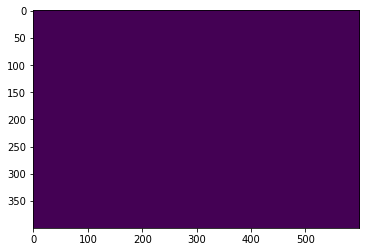

In [35]:
# init('samta.jpg', 4, "rgb", True, True)
# compareColor('crops.jpg')
compareColor()